# Price Analysis

### Problem Statement : Finding market price to determine a suitable listing price

> Project Purpose : Scrape Carousell listings based on search term to get the max, min and average market price of the respective item, followed by doing some simple vizualization using matplotlib and seaborn


## Step 1: Importing Libraries

In [190]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import numpy as np
%matplotlib inline

## Step 2: Enter search item

In [191]:
#Thermos thermal flask

search_term = "%20".join(input("Enter Search Keyword: ").split())
url = f"https://sg.carousell.com/search/products/?query={search_term}"
print(url)

r = requests.get(url)

Enter Search Keyword: rooms for rent in pasir ris
https://sg.carousell.com/search/products/?query=rooms%20for%20rent%20in%20pasir%20ris


## Step 3: Using selenium for webscarping and web navigation. Followed by parsing data collected over to bs4

In [193]:
from selenium import webdriver
import time

driver = webdriver.Chrome('C:/Users/Clover/Downloads/chromedriver.exe')
driver.get(url)
driver.maximize_window()
driver.set_page_load_timeout(60)

html = driver.page_source.encode('utf-8')
page_num = 0

while driver.find_elements_by_xpath('//*[@id="root"]/div/div[3]/div[1]/div[2]/main/div/button'):
    driver.find_element_by_xpath('//*[@id="root"]/div/div[3]/div[1]/div[2]/main/div/button').click()
    page_num += 1
    print("getting page number "+str(page_num))
    time.sleep(5)

html = driver.page_source.encode('utf-8')



In [197]:
# soup = BeautifulSoup(r.text,"html.parser")
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="6r9dvBAYaV-XPXeQO1vW5a49IU9RUY0GurZzrOemxG8" name="google-site-verification"/>
<link href="/favicon.ico?v=2.0" rel="icon"/>
<link crossorigin="" href="https://mweb-cdn.karousell.com" rel="dns-prefetch preconnect"/>
<link crossorigin="" href="https://cdn.karousell.com" rel="dns-prefetch preconnect"/>
<link crossorigin="" href="https://www.google-analytics.com" rel="dns-prefetch preconnect"/>
<link crossorigin="" href="https://www.googletagmanager.com" rel="dns-prefetch preconnect"/>
<title>rooms for rent in pasir ris - View all rooms for rent in pasir ris ads in Carousell Singapore</title>
<meta content="Browse results for rooms for rent in pasir ris on Carousell Singapore. Brand new and used for sale. Chat to buy!" data-react-helmet="true" name="description"/><meta content="carousell:item" data-react-helmet="true" property="og:type"/><m

## Step 4: Data Cleaning and Wrangling

In [198]:
# Get title

title=[]
title_elem = soup.find_all('p', class_='styles__text___1gJzw styles__colorUrbanGrey60___2rwkI styles__overflowNormal___mT74G styles__singleline___nCFol styles__textAlignLeft___lqg5e styles__weightSemibold___uxIDP desktop__sizeS___30RAN')
title_elem

for item in title_elem:
    title.append(item.text)

title

['Treasure At Tampines',
 'Pasir Ris Blk559 Common Room For Rent.',
 'Common Room for rent at Pasir Ris!',
 'Room for Rent / Share Room@Elias Road Pasir Ris ',
 'Room/Studio for Rent - Pasir Ris',
 'room for rent in pasir ris',
 'Pasir Ris Condo common room for rent',
 'Common room at 193 Pasir Ris street 12 for rent! Aircon wifi!',
 'Master Room For Rent Pasir Ris',
 'Blk 442 Pasir Ris Drive 6 - Common Room For Rent',
 'Common room at 548 pasir ris street 51 for rent! Aircon wifi! Cooking allowed!',
 '229 Pasir Ris Street 21 Common Room For Rent',
 'Common Room for Rent at 469 Pasir Ris Drive 6',
 'Condo room for rent@ Pasir Ris',
 '571 Pasir Ris Street 53 2 Common Rooms For Rent',
 'Master Room for rent at Pasir Ris near Loyang Point',
 'Pasir ris Common room for rent',
 'Common room at 641 pasir ris drive 1 for rent! Aircon wifi!',
 'Pasir Ris terrace',
 'Pasir Ris Sea Horizon condo 2 common rooms for rent, full furnish, high floor with sea view',
 '223 PASIR RIS STREET 21']

In [199]:
# Get username
username=[]
username_elem = soup.find_all('p', class_='styles__text___1gJzw styles__colorUrbanGrey90___2NNa9 styles__overflowNormal___mT74G styles__singleline___nCFol styles__textAlignLeft___lqg5e styles__weightSemibold___uxIDP desktop__sizeS___30RAN')
username_elem

for item in username_elem:
    username.append(item.text)
    
username

['andytanera',
 'garysonbzm',
 'nrpropertysg',
 'darrelyip',
 'rarevaluehomes',
 'andywinston',
 'smilecstl',
 'iamironman',
 'dennizkee',
 'andrew.seow69',
 'iamironman',
 'r023951a',
 'shirleyongbk',
 'stationgo',
 'r023951a',
 'arunarunarun',
 'xingxingxingxing',
 'iamironman',
 'calebgal',
 'chenglin.hsieh',
 'r004136c']

In [200]:
# Get price
price=[]
price_elem = soup.select("a > p:nth-of-type(2)")
price_elem

for item in price_elem:
    
    price.append(item.text)
    
price = [e[2:] for e in price]
mylist = []

for i in price:
    if '.' in i:
        my_num = float(i)
#         mylist.append(my_num)
    else:
        if ',' in i:
            ind = i.index(',')
            my_num = int(str(i[0:ind]) + str(i[ind + 1:]))
        else:
           my_num = int(i) 
    mylist.append(my_num)

price = [int(i) for i in mylist]
price

[649000,
 500,
 550,
 400,
 1350,
 750,
 780,
 650,
 950,
 700,
 650,
 700,
 650,
 800,
 700,
 800,
 750,
 700,
 750,
 900,
 920]

In [201]:
# Get likes
likes=[]
likes_elem = soup.find_all('span', class_='styles__text___1gJzw styles__colorUrbanGrey60___2rwkI styles__overflowNormal___mT74G styles__multiline___2m1WF styles__textAlignLeft___lqg5e styles__weightRegular___19l6i desktop__sizeS___30RAN')
likes_elem

for item in likes_elem:
    
    likes.append(item.text)
    
likes = ['0' if x == '\xa0' else x for x in likes]

likes = [int(i) for i in likes]
likes

[51, 7, 1, 1, 38, 2, 18, 1, 3, 0, 19, 2, 0, 25, 3, 3, 4, 1, 6, 8, 6]

In [202]:
# Get time
import re
time=[]
time_elem = soup.find_all('p', class_='styles__text___1gJzw styles__colorUrbanGrey60___2rwkI styles__overflowNormal___mT74G styles__singleline___nCFol styles__textAlignLeft___lqg5e styles__weightRegular___19l6i styles__attributeTime___3HOr_ desktop__sizeS___30RAN')
time_elem

for item in time_elem:
    time.append(item.text)


for index in range(len(time)):
    splited= time[index].split(" ")
    if splited[1] =="hour" or splited[1] =="hours":
        time[index] = int(time[index].split(" ")[0])//24
    else:
        time[index] = int(time[index].split(" ")[0])

time

[2, 5, 5, 3, 17, 16, 15, 5, 10, 4, 3, 9, 20, 19, 15, 12, 20, 4]

In [203]:
# Get condition
condition=[]

condition_elem = soup.select("a > p:nth-of-type(4)")
# soup.find_all('p', class_='styles__text___1gJzw styles__colorUrbanGrey60___2rwkI styles__overflowNormal___mT74G styles__singleline___nCFol styles__textAlignLeft___lqg5e styles__weightRegular___19l6i styles__attributeTime___3HOr_ desktop__sizeS___30RAN')
condition_elem

for item in condition_elem:
    condition.append(item.text)
    
condition

['Condominium',
 '',
 'Common Room',
 'EA (Exec Apartment)',
 '',
 'Common Room',
 'Common Room',
 '',
 'Master Room',
 'Common Room',
 '',
 'Common Room',
 '4A',
 'Common Room',
 'Common Room',
 'Master Room',
 'Condominium',
 '',
 'Common Room',
 'Common Room',
 'HDB Type: Unknown']

## Step 6: Loading cleaned data into pandas dataframe

In [204]:
# Create dataframe

final_array =[]

for titles, usernames, prices, no_of_likes, period_posted, conditions in zip (title, username, price, likes, time, condition):
    final_array.append({'Titles':titles,'User':usernames,'Price':prices,'Likey':no_of_likes,'Days':period_posted,'Cond':conditions})

df = pd.DataFrame(final_array)
df = df[['Titles', 'User','Price', 'Likey', 'Days','Cond']]
df.head(10)

,Titles,User,Price,Likey,Days,Cond
0,Treasure At Tampines,andytanera,649000,51,2,Condominium
1,Pasir Ris Blk559 Common Room For Rent.,garysonbzm,500,7,5,
2,Common Room for rent at Pasir Ris!,nrpropertysg,550,1,5,Common Room
3,Room for Rent / Share Room@Elias Road Pasir Ris,darrelyip,400,1,3,EA (Exec Apartment)
4,Room/Studio for Rent - Pasir Ris,rarevaluehomes,1350,38,17,
5,room for rent in pasir ris,andywinston,750,2,16,Common Room
6,Pasir Ris Condo common room for rent,smilecstl,780,18,15,Common Room
7,Common room at 193 Pasir Ris street 12 for ren...,iamironman,650,1,5,
8,Master Room For Rent Pasir Ris,dennizkee,950,3,10,Master Room
9,Blk 442 Pasir Ris Drive 6 - Common Room For Rent,andrew.seow69,700,0,4,Common Room


In [205]:
df_info = df['Price'].describe()
df_info


# print("The mean price: $", int(df['Price'].mean()))
# print("The Q1 price: $", int(df['Price'].quantile(q=0.25))+1)
# print("The Q3 price: $", int(df['Price'].quantile(q=0.75)))


count        18.000000
mean      36743.333333
std      152799.247881
min         400.000000
25%         650.000000
50%         700.000000
75%         795.000000
max      649000.000000
Name: Price, dtype: float64

## Step 7: Data Exploration and Vizualization using matplotlib and seaborn

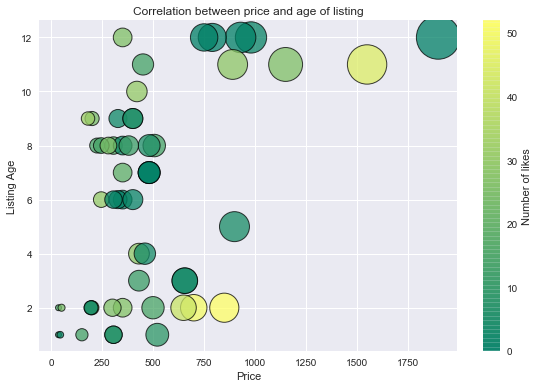

In [187]:
plt.style.use("seaborn")

price_x = df['Price'].values.tolist()
age_y = df['Days'].values.tolist()
likes = df['Likey'].values.tolist()

colors = likes
sizes = price_x

plt.scatter(price_x, age_y, linewidth=1, s=sizes, alpha=0.75, label="value", c=likes, cmap='summer', edgecolor='black')

#additions :  c=likes, cmap='summer', edgecolor='black',

#Log Scale (in case scatterplot gets too dense)
# plt.xscale('log')
# plt.yscale('log')



# plt.legend()
cbar = plt.colorbar()
cbar.set_label('Number of likes')

plt.title("Correlation between price and age of listing")
plt.xlabel("Price")
plt.ylabel("Listing Age")

plt.tight_layout()

plt.show()



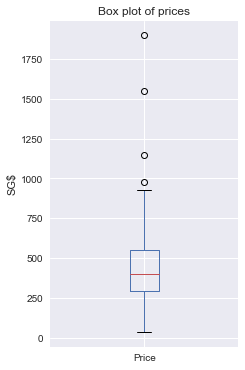

In [183]:
fig = plt.figure()
ax = fig.add_subplot(111)


# Plot the boxplot. 
df['Price'].plot(kind='box', 
                 title="Box plot of prices", 
                 figsize=(3, 6), ax=ax)


# Set the label of the y-axis
ax.set_ylabel("SG$")

plt.show()

In [184]:
# correlation matrix
new_col = df[['Titles', 'User','Price', 'Likey', 'Days','Cond']]
new_col.corr()

,Price,Likey,Days
Price,1.000000,0.070965,0.47011
Likey,0.070965,1.000000,-0.11871
Days,0.470110,-0.118710,1.00000


In [ ]:
from IPython.display import IFrame
wiki = IFrame(src='https://en.wikipedia.org/wiki/Pearson_correlation_coefficient',
              width=1000,
              height=400)
display(wiki)

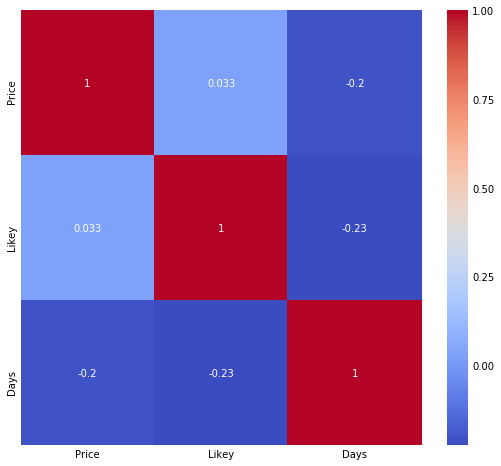

In [74]:
plt.figure(figsize=(8,8))
sns.heatmap(new_col.corr(), annot=True, cmap='coolwarm')

#blue negative correlation

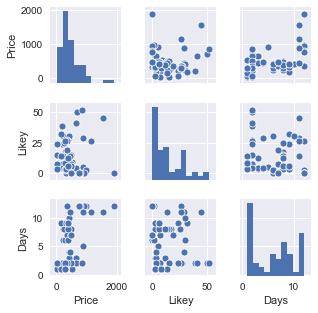

In [185]:
# compare pairplot and heatmap positive and negative correlation 
sns.pairplot(new_col, height=1.5)
